In [1]:
import os
import ast
import sys
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
res_dir = '/home/kronos/Bureau/Thèse/mobility-prediction/simulation/webots/pf/results/exp_20_10-20'
data_dir = '/home/kronos/Bureau/Thèse/mobility-prediction/simulation/webots/pf/controllers/pf2/data/500_181/'
region_size = 100
res_time = 120

In [3]:
with open(data_dir+'param.txt', "r") as fichier:
    contenu = fichier.read()

match = re.search(r'map dimensions: (\d+),(\d+)', contenu)

if match:
    map_width = int(match.group(1))
    map_height = int(match.group(2))

In [4]:
def to_array(density, map_width, map_height, region_size):
     return [[density.get((i, j), 0) for j in range(map_width // region_size)] for i in range(map_height // region_size)]
def flatten(density):
    return [item for sublist in density for item in sublist]

In [5]:
contenu_dossier = os.listdir(res_dir)
mae_res = []
mse_res = []
rmse_res = []

for element in contenu_dossier:
    chemin_complet = os.path.join(res_dir, element)
    if os.path.isdir(chemin_complet):
        print("\n")
        print("Nom du dossier :", element)

        lignes_correspondantes = []
        sim_ligne = []
        obs_ligne = []
        sim = []
        obs = []
        
        mae_list = []
        mse_list = []
        rmse_list = []

        with open(chemin_complet + '/output.txt', 'r') as fichier:
            for ligne in fichier:
                if ligne.startswith("sim data"):
                    sim_ligne.append(ligne.strip())  
                if ligne.startswith("obs data"):
                    obs_ligne.append(ligne.strip())

        for ligne in sim_ligne:
            
            liste_string = ligne.split(" :")[1].strip()
            s = ast.literal_eval(liste_string)
            s = flatten(to_array(s, map_width, map_height, region_size))
            sim.append(s)

        for ligne in obs_ligne:
    
            liste_string = ligne.split(" :")[1].strip()
            o = ast.literal_eval(liste_string)
            o = flatten(to_array(o, map_width, map_height, region_size))
            obs.append(o)
            
        for s, o in zip(sim, obs):
            
            densites_predites = np.array(s)
            densites_reelles = np.array(o)
            
            mae = np.mean(np.abs(np.array(densites_predites) - np.array(densites_reelles)))
            print("\n")
            print("mae :", mae)
            mae_list.append(mae)
            
            mse = np.mean((densites_predites - densites_reelles)**2)
            print("mse :", mse)
            mse_list.append(mse)
            
            rmse = np.sqrt(mse)
            print("rmse :", rmse)
            rmse_list.append(rmse)
            
            non_zero_sim = [value for value in s if value != 0.0]
            non_zero_obs = [value for value in o if value != 0.0]

            # Calculer la moyenne des observations non nulles
            mean = np.mean(non_zero_sim)
            print("mean sim:", mean)
            mean = np.mean(non_zero_obs)
            print("mean obs:", mean)
        
    mae_res.append(mae_list)
    mse_res.append(mse_list)
    rmse_res.append(rmse_list)



Nom du dossier : robot_0


mae : 4.32
mse : 34.32
rmse : 5.858327406350724
mean sim: 20.0
mean obs: 20.0


mae : 3.68
mse : 18.32
rmse : 4.280186911806539
mean sim: 20.0
mean obs: 20.0


mae : 3.44
mse : 21.44
rmse : 4.6303347611160905
mean sim: 20.0
mean obs: 20.0


mae : 3.12
mse : 14.56
rmse : 3.8157568056677826
mean sim: 20.0
mean obs: 20.0


mae : 0.0
mse : 0.0
rmse : 0.0
mean sim: 20.0
mean obs: 20.0


mae : 4.64
mse : 35.52
rmse : 5.959865770300536
mean sim: 20.0
mean obs: 20.0


mae : 3.76
mse : 21.52
rmse : 4.638965401897281
mean sim: 20.0
mean obs: 20.0


mae : 3.68
mse : 20.8
rmse : 4.560701700396552
mean sim: 20.0
mean obs: 20.0


mae : 3.84
mse : 24.08
rmse : 4.907137658554118
mean sim: 20.0
mean obs: 20.0


mae : 0.0
mse : 0.0
rmse : 0.0
mean sim: 20.0
mean obs: 20.0


mae : 3.84
mse : 26.08
rmse : 5.106858133921482
mean sim: 20.0
mean obs: 20.0


mae : 3.04
mse : 14.4
rmse : 3.794733192202055
mean sim: 20.0
mean obs: 20.0


mae : 4.64
mse : 28.0
rmse : 5.29150262212918

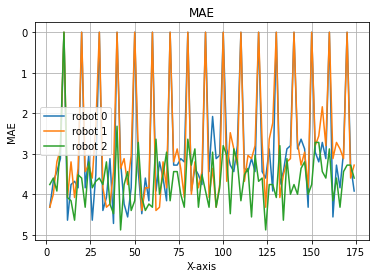

In [6]:
fig, ax = plt.subplots()

x = liste_nombres = list(range(1, len(mae_res[0]) + 1))
my_lambda = lambda x: x * res_time / 60 
x = list(map(my_lambda, x))

for i, mae in enumerate(mae_res):
    ax.plot(x, mae, label=f'robot {i}')
    
plt.gca().invert_yaxis()
plt.grid()

# Add labels and a legend
ax.set_xlabel('X-axis')
ax.set_ylabel('MAE')
ax.set_title('MAE')
ax.legend()

# Show the plot
plt.show()

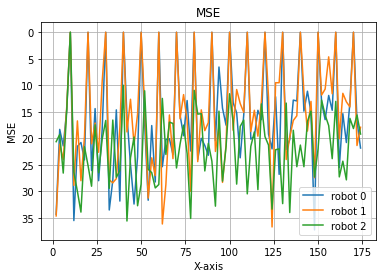

In [7]:
fig, ax = plt.subplots()

x = liste_nombres = list(range(1, len(mse_res[0]) + 1))
my_lambda = lambda x: x * res_time / 60 
x = list(map(my_lambda, x))

for i, mse in enumerate(mse_res):
    ax.plot(x, mse, label=f'robot {i}')
    
plt.gca().invert_yaxis()
plt.grid()

# Add labels and a legend
ax.set_xlabel('X-axis')
ax.set_ylabel('MSE')
ax.set_title('MSE')
ax.legend()

# Show the plot
plt.show()

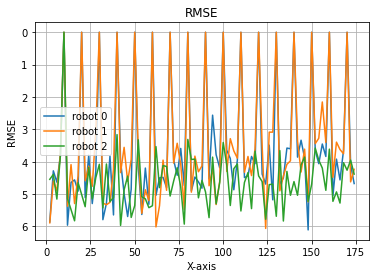

In [8]:
fig, ax = plt.subplots()

x = liste_nombres = list(range(1, len(rmse_res[0]) + 1))
my_lambda = lambda x: x * res_time / 60 
x = list(map(my_lambda, x))

for i, rmse in enumerate(rmse_res):
    ax.plot(x, rmse, label=f'robot {i}')
    
plt.gca().invert_yaxis()
plt.grid()

# Add labels and a legend
ax.set_xlabel('X-axis')
ax.set_ylabel('RMSE')
ax.set_title('RMSE')
ax.legend()

# Show the plot
plt.show()